In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [4]:
df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 50)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,2.240150e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.432227e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.386744e-16,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df.describe()['Amount']

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [9]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Splitting data into fraudulent/non-fraudulent transactions:

In [10]:
fraudulent_transactions = df[df['Class']==1]
non_fraudulent_transactions = df[df['Class']==0]

In [11]:
pd.DataFrame({'Fraud_Means':fraudulent_transactions.describe().loc['mean'], 'Non-Fraud Means':non_fraudulent_transactions.describe().loc['mean']})

,Fraud_Means,Non-Fraud Means
Time,80746.806911,94838.202258
V1,-4.771948,0.008258
V2,3.623778,-0.006271
V3,-7.033281,0.012171
V4,4.542029,-0.007860
V5,-3.151225,0.005453
V6,-1.397737,0.002419
V7,-5.568731,0.009637
V8,0.570636,-0.000987
V9,-2.581123,0.004467


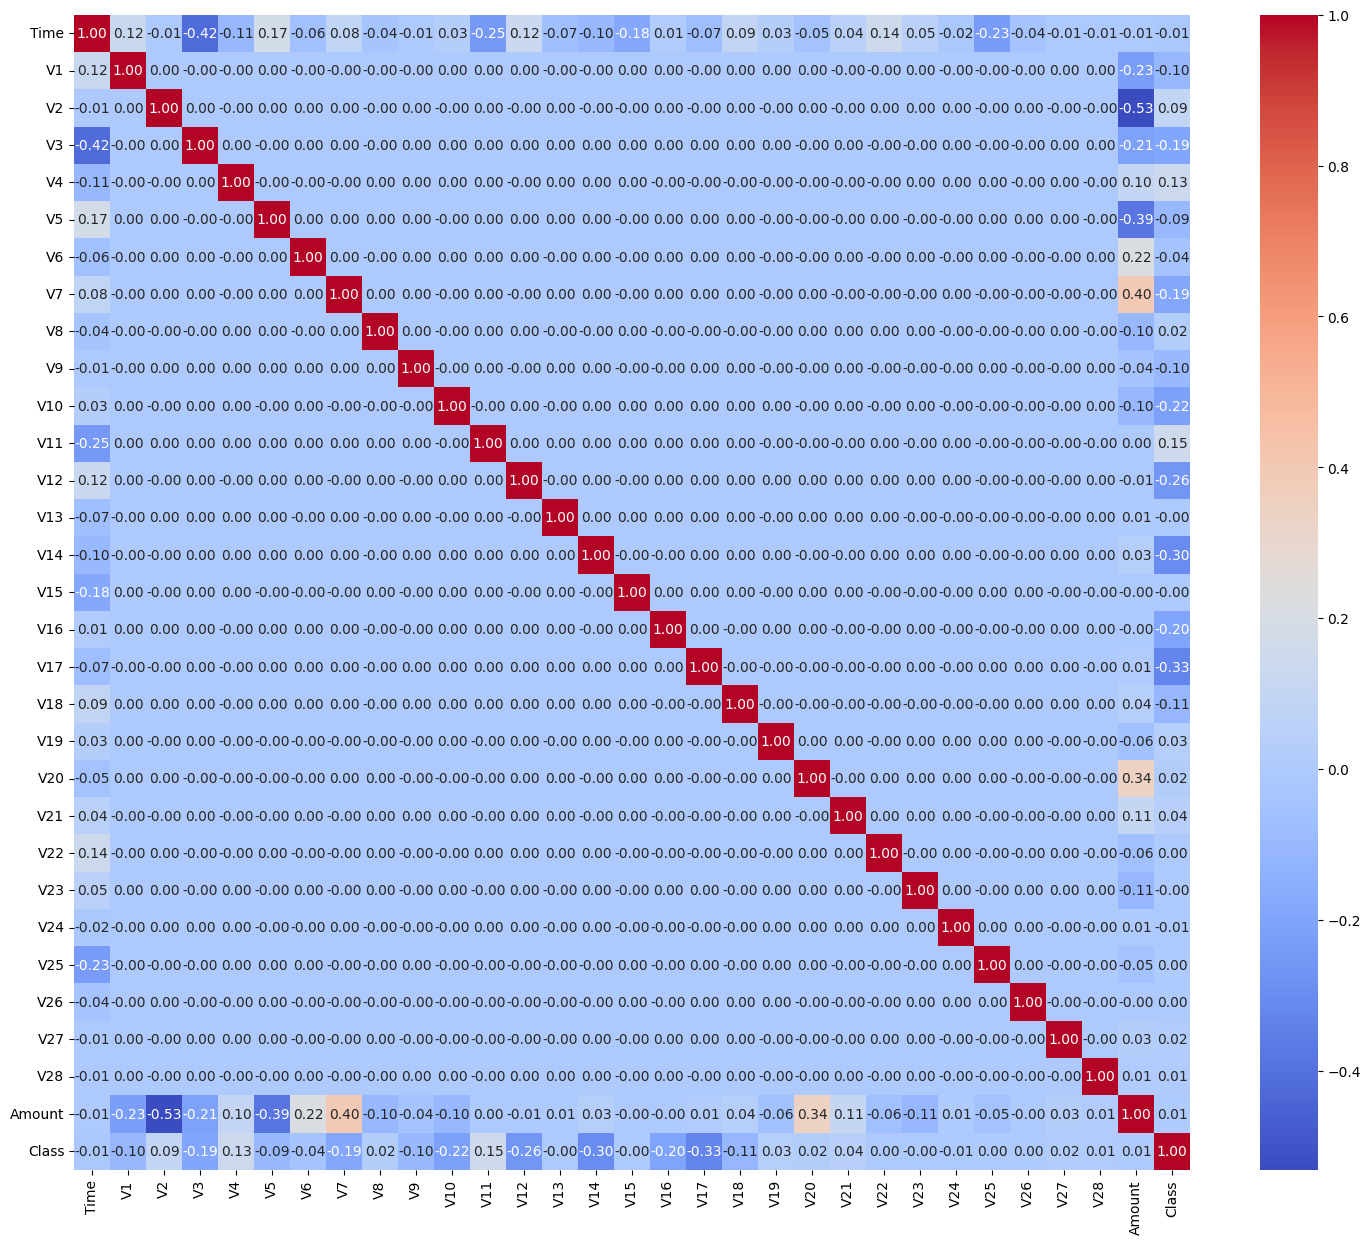

In [12]:
correlation_matrix = df.corr()
plt.figure(figsize=(18,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [13]:
df.corr()['Class'].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

(N.B. including class & time does not make sense here)

No evident multicollinearity between V1, V2, ..., V28, a direct consequence of the PCA transformation

Note on PCA: 'transforms  variables into a set of new variables called **prinicpal components** which have the following key properties:

1. **Orthogonality**: PCs are constructued to be uncorrelated to each other
2. **Variance Maximization**: Each PC captures the maximum variance possible in the data this is not already caputred by preceding components

In [14]:
from scipy.stats import ttest_ind

t_stats = {}

for feature in df.columns[:-1]:
    fraud_values = df[df['Class']==1][feature]
    non_fraud_values = df[df['Class']==0][feature]
    t_stat, p_value = ttest_ind(fraud_values, non_fraud_values, equal_var=False)
    t_stats[feature] = t_stat
    print(f"{feature}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

t_stats

Time: t-stat = -6.5286, p-value = 0.0000
V1: t-stat = -15.6291, p-value = 0.0000
V2: t-stat = 18.7612, p-value = 0.0000
V3: t-stat = -21.9760, p-value = 0.0000
V4: t-stat = 35.1164, p-value = 0.0000
V5: t-stat = -13.0321, p-value = 0.0000
V6: t-stat = -16.7067, p-value = 0.0000
V7: t-stat = -17.1688, p-value = 0.0000
V8: t-stat = 1.8651, p-value = 0.0628
V9: t-stat = -22.9285, p-value = 0.0000
V10: t-stat = -25.7553, p-value = 0.0000
V11: t-stat = 31.5192, p-value = 0.0000
V12: t-stat = -29.8800, p-value = 0.0000
V13: t-stat = -2.1979, p-value = 0.0284
V14: t-stat = -36.2010, p-value = 0.0000
V15: t-stat = -1.9654, p-value = 0.0499
V16: t-stat = -23.7989, p-value = 0.0000
V17: t-stat = -21.2477, p-value = 0.0000
V18: t-stat = -17.2135, p-value = 0.0000
V19: t-stat = 9.8193, p-value = 0.0000
V20: t-stat = 6.1415, p-value = 0.0000
V21: t-stat = 4.0977, p-value = 0.0000
V22: t-stat = 0.2088, p-value = 0.8347
V23: t-stat = -0.5669, p-value = 0.5710
V24: t-stat = -4.5253, p-value = 0.0000
V

{'Time': -6.528561578590792,
 'V1': -15.629064609674844,
 'V2': 18.761176823315797,
 'V3': -21.976004399367977,
 'V4': 35.11644940739403,
 'V5': -13.032118672974825,
 'V6': -16.706743494730446,
 'V7': -17.168754779170776,
 'V8': 1.8651390657084315,
 'V9': -22.92848084125407,
 'V10': -25.75526028732098,
 'V11': 31.51922317264853,
 'V12': -29.88002649494514,
 'V13': -2.1979118190355287,
 'V14': -36.201024075996244,
 'V15': -1.9653685478602232,
 'V16': -23.798892084037867,
 'V17': -21.247726971069667,
 'V18': -17.213505574351657,
 'V19': 9.819276211293447,
 'V20': 6.1415290755504275,
 'V21': 4.097655091201303,
 'V22': 0.20881499485853694,
 'V23': -0.5669012217496844,
 'V24': -4.525328224597574,
 'V25': 1.1548251524233895,
 'V26': 2.4307991752666234,
 'V27': 2.7526851298151835,
 'V28': 3.0710491107672975,
 'Amount': 2.928789530856467}

In [15]:
dict(sorted(t_stats.items(), key=lambda item: item[1]))

{'V14': -36.201024075996244,
 'V12': -29.88002649494514,
 'V10': -25.75526028732098,
 'V16': -23.798892084037867,
 'V9': -22.92848084125407,
 'V3': -21.976004399367977,
 'V17': -21.247726971069667,
 'V18': -17.213505574351657,
 'V7': -17.168754779170776,
 'V6': -16.706743494730446,
 'V1': -15.629064609674844,
 'V5': -13.032118672974825,
 'Time': -6.528561578590792,
 'V24': -4.525328224597574,
 'V13': -2.1979118190355287,
 'V15': -1.9653685478602232,
 'V23': -0.5669012217496844,
 'V22': 0.20881499485853694,
 'V25': 1.1548251524233895,
 'V8': 1.8651390657084315,
 'V26': 2.4307991752666234,
 'V27': 2.7526851298151835,
 'Amount': 2.928789530856467,
 'V28': 3.0710491107672975,
 'V21': 4.097655091201303,
 'V20': 6.1415290755504275,
 'V19': 9.819276211293447,
 'V2': 18.761176823315797,
 'V11': 31.51922317264853,
 'V4': 35.11644940739403}

Convert class to **categorical for EDA**, turn back to **numeric for model building**

In [16]:
df['Class'] = df['Class'].astype('category')

In [17]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Handling the class imbalance

In [18]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

X = df.drop(columns = ['Class'])
y = df['Class']

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.01)
pipeline = Pipeline(steps = [('under', under), ('over', over)])
X_resampled, y_resampled = pipeline.fit_resample(X,y)

X_resampled.head()
y_resampled.value_counts()

Class
0    49200
1    24600
Name: count, dtype: int64

Consider trying ADASYN instead of SMOTE for oversampling

In [19]:
X_resampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,69999.0,1.158519,0.015627,0.732344,0.983343,-0.855541,-1.015518,-0.004221,-0.159122,0.467238,-0.194899,-0.233783,0.503812,-0.403479,0.021682,-0.216980,-0.422386,0.241822,-0.849610,0.013927,-0.116959,-0.189025,-0.419986,0.065919,0.955890,0.366985,0.234722,-0.026979,0.021007,25.41
1,142373.0,1.829892,-1.233655,-2.650180,-1.067411,0.329702,-0.612018,0.435759,-0.424329,-1.312494,0.966424,0.747415,0.108908,0.588534,0.485840,-0.667962,0.760304,-0.078354,-1.105248,1.010476,0.493275,0.507834,0.919892,-0.312524,0.223244,0.427884,0.038831,-0.125313,-0.049284,241.76
2,150179.0,2.019791,0.110368,-1.604353,0.345811,0.377627,-0.665058,0.082279,-0.098248,0.229786,-0.207763,1.289099,0.868082,-0.107781,-0.625834,-0.503016,0.460697,0.293940,0.133159,0.272316,-0.155403,-0.301519,-0.801906,0.351592,0.668281,-0.314892,0.142809,-0.066537,-0.038929,1.29
3,81776.0,-4.153467,3.573299,-0.680505,0.789877,-1.892910,-0.611796,-1.097777,1.659229,0.710787,1.271566,-1.274273,0.895176,0.225010,0.539674,-0.047496,-0.391605,0.796832,-0.280504,0.732148,0.082779,-0.053352,-0.359863,0.164717,0.355614,0.029841,-0.645194,-1.664856,-0.582177,2.89
4,44429.0,-0.785067,1.317997,1.693877,2.673836,-0.525390,0.460320,-0.386946,0.837810,-1.252511,0.850437,0.297769,-0.905431,-1.867145,0.964375,1.008504,0.692350,-0.212500,1.371351,0.977803,0.086495,0.248220,0.571901,-0.165084,-0.046805,-0.237387,0.338497,0.253557,0.112481,10.62


In [20]:
print(X_resampled.shape, y_resampled.value_counts())

(73800, 30) Class
0    49200
1    24600
Name: count, dtype: int64


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

## Model Building

### 1. XGBoost

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [23]:
from xgboost import XGBClassifier
model = XGBClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[9842    7]
 [   3 4908]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9849
           1       1.00      1.00      1.00      4911

    accuracy                           1.00     14760
   macro avg       1.00      1.00      1.00     14760
weighted avg       1.00      1.00      1.00     14760



### 2. Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[9751   98]
 [ 230 4681]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9849
           1       0.98      0.95      0.97      4911

    accuracy                           0.98     14760
   macro avg       0.98      0.97      0.97     14760
weighted avg       0.98      0.98      0.98     14760



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3. K-Nearest Neighbors

Have a look at the parameters for KNN (different from the base parameters) - very different results (worse)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

[[9142  707]
 [ 793 4118]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92      9849
           1       0.85      0.84      0.85      4911

    accuracy                           0.90     14760
   macro avg       0.89      0.88      0.89     14760
weighted avg       0.90      0.90      0.90     14760



### 4. Random Forest

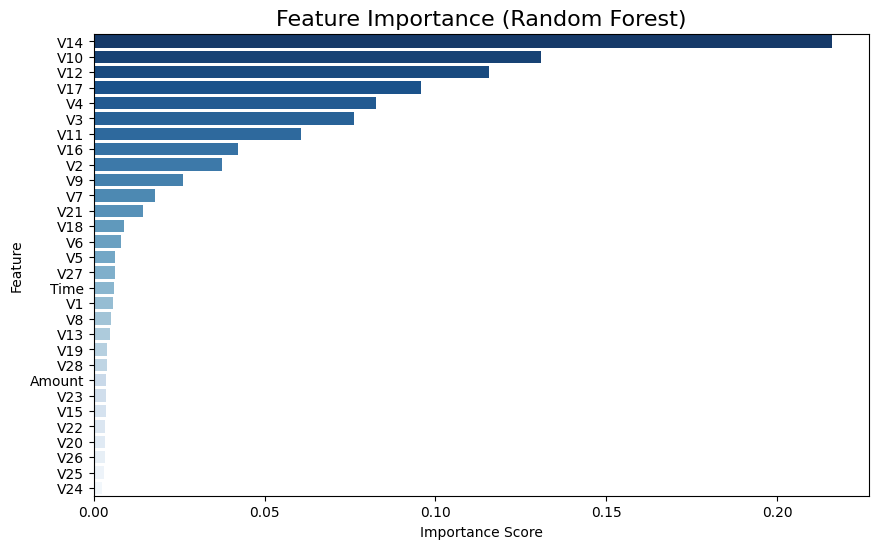

,Feature,Importance
14,V14,0.216024
10,V10,0.130792
12,V12,0.115614
17,V17,0.095816
4,V4,0.082683
3,V3,0.076027
11,V11,0.060518
16,V16,0.042341
2,V2,0.037404
9,V9,0.026246


In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

importances = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df['Feature'], palette="Blues_r")
plt.title("Feature Importance (Random Forest)", fontsize=16)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

importance_df.head(10)

## Distribution of 'Amount'

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(y='Amount', data=df, ax=axes[0])
axes[0].set_title('Distribution of amount')

sns.boxplot(x='Class', y='Amount', data=df, ax=axes[1])
axes[1].set_title('Distribution of amount grouped by class')

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

sns.boxplot(y='Amount', data=df[df['Amount']<10000], ax=axes[0])
axes[0].set_title('Distribution of amount')

sns.boxplot(x='Class', y='Amount', data=df[df['Amount']<10000], ax=axes[1])
axes[1].set_title('Distribution of amount grouped by class')

In [ ]:
summary_amount_fraud = df[df['Class']==1].describe()['Amount']
summary_amount_nonfraud = df[df['Class']==0].describe()['Amount']

print(summary_amount_fraud, '\n')
print(summary_amount_nonfraud)

In [ ]:
sns.boxplot(y='Amount', data=df[df['Amount']<10000])

In [ ]:
df.describe()['Amount']

In [ ]:
amount_iqr = df.describe()['Amount'].loc['75%'] - df.describe()['Amount'].loc['25%']
amount_iqr

In [ ]:
sns.pairplot(df)

## Check volume of transactions over time

In [ ]:
sns.distplot(df['Time'])

In [ ]:
df.describe()['Time']

It is safe to assume that the first and last transactions were at the beginning and end of the two days:

Difference of 172,792 seconds: there are 172800 seconds across 2 days

Explains two spikes in transactions (daytime->nighttime-->daytime-->nighttime)

In [ ]:
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraud', fill=True, color='green', alpha=0.3)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', fill=True, color='red', alpha=0.3)

plt.title("Density of Transactions Over Time (Fraud vs Non-Fraud)", fontsize=16)
plt.xlabel("Time (seconds since first transaction)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()

In [ ]:
fraudulent_transactions

#### Boxplots:

In [ ]:
pca_vars = df.columns[1:29]
for var in pca_vars:
    sns.boxplot(x='Class', y=var, data=df)
    plt.show()

In [ ]:
pca_vars = df.columns[1:29]
from scipy.stats import ttest_ind

for component in pca_vars:
    t_stat, p_value = ttest_ind(fraud_values, non_fraud_values, equal_var=False)
    print(f"{component}: t-stat = {t_stat:.4f}, p-value = {p_value:.4f}")

## Histograms (Distributions of PCA Variables)

In [ ]:
for var in pca_vars:
    sns.histplot(x=var, data=df, bins=50)
    plt.show()

In [ ]:
for component in pca_vars:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[df['Class'] == 0][component], label='Non-Fraud', shade=True)
    sns.kdeplot(df[df['Class'] == 1][component], label='Fraud', shade=True)
    plt.title(f"Distribution of {component} by Class")
    plt.xlabel(component)
    plt.legend()
    plt.show()